In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats


# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data.head(100)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Ch√¢teau Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux


# What kind of data do we have?

country - categorical string data

description - categorical string data

desgination - categorical string data

points - continuous integer data

price - continuous integer data

province - categorical string data

region - categorical string data

variety - categorical string data

winery - categorical string data

##### Checking for missing values...

In [8]:
missing_values_count = wine_data.isnull().sum()
missing_values_count

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

We see we have a big problem with missing data. Some columns are possible to attempt imputation, whilst others are not:

Designation: Not possible to attempt imputation without creating unneccesary bias in the dataset. Designations may not be completely random but do appear close to it.

Price: Again not possible to attempt imputation without creating a bias in the data. Price is such a subjective variable 

region_1 and region_2: Could be possible to do some imputation as there will be some other reference points in the dataset that may allow us to infer what the missing value should be.

#### * To impute region 1 and 2, first of start by sorting by province and regions 1 and 2 to see if there is a discernible pattern in the regions and then based on combinations of available data in region_1 and region_2, impute the relevant missing variable.

In [3]:
# grouping by province and regions 1 and 2

wine_sorted = wine_data.sort_values(['country','province', 'region_1','region_2'], ascending=[True,True,True,True])
wine_sorted.tail(75)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
289,289,US,Sourced from a 15-acre vineyard on Parrett Mou...,Clay Court,91,60.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Elk Cove
309,309,US,There is a darker fruit spectrum evident in th...,Evenstad Reserve,94,70.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Domaine Serene
329,329,US,"Polished in every way, this brings an enticing...",Aurora Vineyard,94,63.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Ponzi
337,337,US,This lush offering opens with appealing aromas...,NaN,91,30.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,La Crema
354,354,US,"Principally Pinot Noir, the blend includes 25%...",Brut Ros√©,91,50.0,Oregon,Willamette Valley,Willamette Valley,Sparkling Blend,Argyle
...,...,...,...,...,...,...,...,...,...,...,...
105,105,US,Aromas of ripe (leaning almost overripe) apple...,Tudor Hills Vineyard,86,17.0,Washington,Yakima Valley,Columbia Valley,Pinot Grigio,Martinez & Martinez
183,183,US,"Stainless-steel fermented and aged, this 100% ...",Boushey Vineyard,88,20.0,Washington,Yakima Valley,Columbia Valley,Picpoul,Syncline
431,431,US,"This blend of Marsanne (32%), Grenache Blanc (...",Southern,87,22.0,Washington,Yakima Valley,Columbia Valley,Rh√¥ne-style White Blend,Cairdeas
698,698,US,Hailing from Olsen and Elephant Mountain viney...,En Hommage,90,28.0,Washington,Yakima Valley,Columbia Valley,Syrah,Kevin White


After sorting the dataframe it's apparent the missing values in the region columns can be imputed by replacing the missing value with the corresponding value from the other region or province column. As such imputation isn't necessary to achieve our objectives.

In [4]:
variety_list = ['Cabernet Sauvignon', 'Chardonnay', 'Pinot Noir']
new_wine = wine_sorted[wine_sorted['variety'].isin(variety_list)]
new_wine.head(100)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
269,269,Argentina,"Immediately this smells raisiny, but with time...",Single Vineyard Reserva,88,15.0,Mendoza Province,Agrelo,NaN,Cabernet Sauvignon,Lamadrid
326,326,Argentina,"Open-grain oak aromas are out front, followed ...",Alta Barrancas Vineyards,94,50.0,Mendoza Province,Mendoza,NaN,Cabernet Sauvignon,Pascual Toso
631,631,Australia,Tim Knappstein's decision to focus on the Adel...,The Dagger,90,20.0,South Australia,Adelaide Hills,NaN,Pinot Noir,Riposte
1066,1066,Australia,Hints of lemon curd and struck flint emerge fr...,NaN,88,25.0,South Australia,Eden Valley,NaN,Chardonnay,Heggies Vineyard
987,987,Australia,This is strongly marked by new oak on the nose...,Coal River Valley Single Site,90,65.0,Tasmania,Tasmania,NaN,Pinot Noir,Dalrymple
...,...,...,...,...,...,...,...,...,...,...,...
687,687,US,Silky in cherry and strawberry with a dense mi...,Spire,88,48.0,California,Carneros-Napa Valley,Napa,Pinot Noir,Cuvaison
248,248,US,"Bright orange juice, dill herbs and a slight w...",Limited Selection,88,24.0,California,Central Coast,Central Coast,Chardonnay,Daniel Gehrs
390,390,US,This is the Hearst family's run at a luxury-le...,Proprietor's Reserve,90,50.0,California,Central Coast,Central Coast,Chardonnay,Hearst Ranch
545,545,US,Quite a steal of a deal for a widely available...,Estate Vineyards,90,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch


#### Now to map out the multi plot grid comparing price and points of the different varieties.

<Figure size 640x480 with 0 Axes>

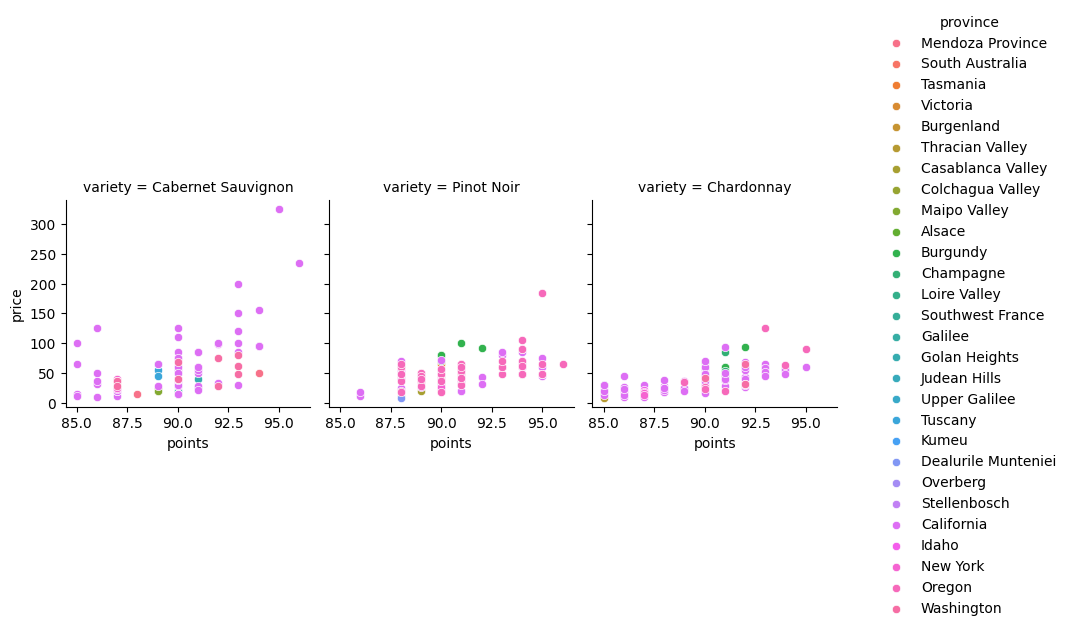

In [25]:
# creating a multi plot grid of various scatterplots

plt.figure()
fg = sns.FacetGrid(new_wine, col="variety",hue="province", margin_titles=True)
fg.map(sns.scatterplot, "points", "price")
fg.add_legend()
plt.show()
plt.close()

On balance it looks like if you want a bottle of wine that scores highly but doesn't break the bank...you're more likely to find a chardonnay that meets this criteria.

### Histograms of the 3 different varieties and their points distribution

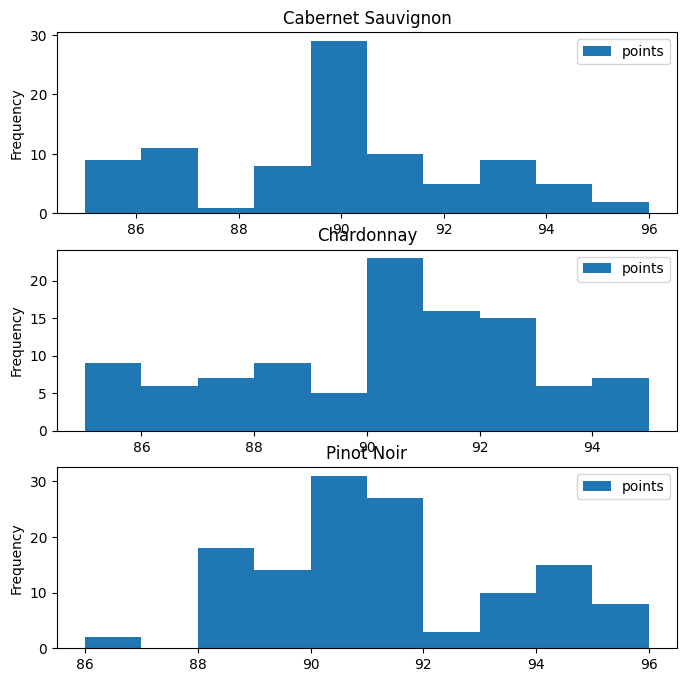

In [24]:
# list variables to use as reference points for the histogram

points_list = new_wine['points']
new_variety_list = new_wine['variety']

# plotting the histogram

df = pd.DataFrame({"variety": new_variety_list, "points": points_list})
ax = df.plot.hist(column=["points"], by="variety", figsize=(8, 8))

## Wordclouds...

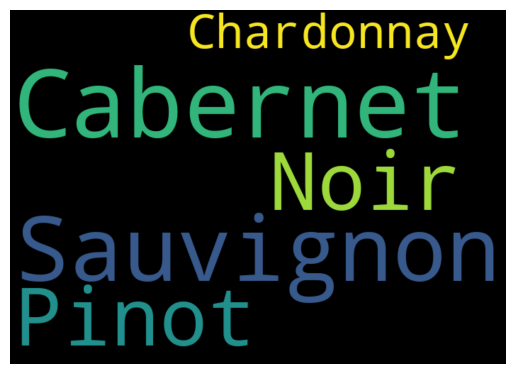

In [8]:
# wordcloud for the different varieties

from wordcloud import WordCloud

text = ("Cabernet Sauvignon Pinot Noir Chardonnay")

wordcloud = WordCloud(width = 700, height = 500, margin = 10).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

In [12]:
# getting all of the unique province values for the wordcloud

provinces = new_wine['province'].unique()
provinces.sort()
provinces

array(['Alsace', 'Burgenland', 'Burgundy', 'California',
       'Casablanca Valley', 'Champagne', 'Colchagua Valley',
       'Dealurile Munteniei', 'Galilee', 'Golan Heights', 'Idaho',
       'Judean Hills', 'Kumeu', 'Loire Valley', 'Maipo Valley',
       'Mendoza Province', 'New York', 'Oregon', 'Overberg',
       'South Australia', 'Southwest France', 'Stellenbosch', 'Tasmania',
       'Thracian Valley', 'Tuscany', 'Upper Galilee', 'Victoria',
       'Washington'], dtype=object)

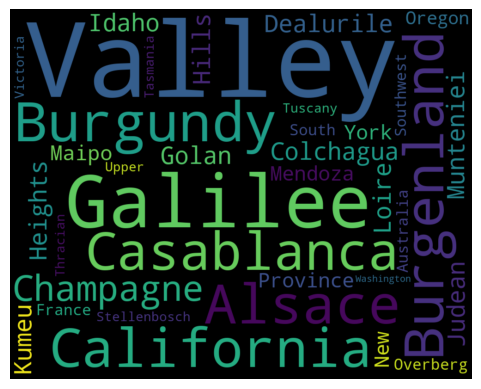

In [17]:
# wordcloud for the different provinces

text = ("Alsace Burgenland Burgundy California Casablanca Valley Champagne Colchagua Valley Dealurile Munteniei Galilee Golan Heights Idaho Judean Hills Kumeu Loire Valley Maipo Valley Mendoza Province New York Oregon Overberg South Australia Southwest France Stellenbosch Tasmania Thracian Valley Tuscany Upper Galilee Victoria Washington")

wordcloud = WordCloud(width = 1000, height = 800, margin = 10).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()